In [ ]:
# !pip install datasets
# !pip install transformers

P.s: for those who use conda for the environment

In [ ]:
# !conda install pytorch::pytorch torchvision torchaudio -c pytorch

In [7]:
# Pretty print
from pprint import pprint
# Datasets load_dataset function
from datasets import load_dataset
# Transformers Autokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
# Standard PyTorch DataLoader
from torch.utils.data import DataLoader

P.s: run these CLIs if there is a notebook error

In [ ]:
# !pip install --upgrade jupyter

In [ ]:
# !pip install --upgrade ipywidgets

Downloading HUPD dataset
- from 1st January, 2016 to 21st January 2016 for training
- from 22nd January, 2016 to 31st January 2016 for testing

In [8]:
hupd_dict = load_dataset('HUPD/hupd',
    name='sample',
    data_files="https://huggingface.co/datasets/HUPD/hupd/blob/main/hupd_metadata_2022-02-22.feather",
    icpr_label=None,
    train_filing_start_date='2016-01-01',
    train_filing_end_date='2016-01-21',
    val_filing_start_date='2016-01-22',
    val_filing_end_date='2016-01-31',
)

print('Loading is done!')

Loading is done!


In [9]:
hupd_dict

DatasetDict({
    train: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 16153
    })
    validation: Dataset({
        features: ['patent_number', 'decision', 'title', 'abstract', 'claims', 'background', 'summary', 'description', 'cpc_label', 'ipc_label', 'filing_date', 'patent_issue_date', 'date_published', 'examiner_id'],
        num_rows: 9094
    })
})

In [ ]:
# print(f'Train dataset size: {hupd_dict["train"].shape}')
# print(f'Validation dataset size: {hupd_dict["validation"].shape}')

In [10]:
hupd_dict['train'][0]['claims']

'1. A compact optical network terminal, comprising: a first interface coupled to a communications network; a second interface coupled to a network client, wherein the second interface is a network connectivity dongle with an optical transceiver at one end; and a processor including a circuitry and a memory coupled to the first interface and to the second interface, wherein the processor is capable of converting optical signals to electric signals, such that the network client can access the communications network thereby reducing the unnecessary splitting of equal upstream wavelengths to all the network clients in the network. 2. The optical network terminal of claim 1, wherein the first interface includes an optical module that receives optical signals via the optical fiber link and converts the optical signals to electrical signals. 3. The optical network terminal of claim 2, wherein the optical module is selectively configurable to support two or more of a broadband passive optical 

In [39]:
org_claim = hupd_dict['train'][0]['claims']
org_claim

'1. A compact optical network terminal, comprising: a first interface coupled to a communications network; a second interface coupled to a network client, wherein the second interface is a network connectivity dongle with an optical transceiver at one end; and a processor including a circuitry and a memory coupled to the first interface and to the second interface, wherein the processor is capable of converting optical signals to electric signals, such that the network client can access the communications network thereby reducing the unnecessary splitting of equal upstream wavelengths to all the network clients in the network. 2. The optical network terminal of claim 1, wherein the first interface includes an optical module that receives optical signals via the optical fiber link and converts the optical signals to electrical signals. 3. The optical network terminal of claim 2, wherein the optical module is selectively configurable to support two or more of a broadband passive optical 

In [11]:
all_claims = []
for i in range(hupd_dict['train'].shape[0]):
    claims_text = hupd_dict['train'][i]['claims']
    all_claims.append(claims_text)

In [ ]:
# # Print the first 5 values of all_claims
# print("First 5 values of all_claims:")
# for i, text in enumerate(all_claims):
#     print(f"Claim {i + 1}:\n{text}\n{'-'*50}")

## extractive summarization

In [12]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [13]:
# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(all_claims)

In [14]:
tfidf_matrix

<16153x64478 sparse matrix of type '<class 'numpy.float64'>'
	with 1642386 stored elements in Compressed Sparse Row format>

In [15]:
# Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
#Function to generate extractive summary using TF-IDF
def generate_summary(text, top_n=5):
    sentences = text.split('. ')  # Split text into sentences
    sentence_scores = [(i, cosine_sim[i].sum()) for i in range(len(sentences))]
    sentence_scores = sorted(sentence_scores, key=lambda x: x[1], reverse=True)[:top_n]
    summary = [sentences[i[0]] for i in sentence_scores]
    return '. '.join(summary)

## generate summary

In [50]:
# Example of generating summaries
example_index = 0  # Change this to any index you want to summarize
example_text = all_claims[example_index]

In [ ]:
summary = generate_summary(example_text)
print("Original Claims:\n", example_text)
print("\nExtractive Summary:\n", summary)

## another method for extractive summarization

In [19]:
import nltk
import os
import re
import math
import operator
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [21]:
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/rei/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/rei/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()

In [21]:
def lemmatize_words(words):
    lemmatized_words = []
    for word in words:
       lemmatized_words.append(wordlemmatizer.lemmatize(word))
    return lemmatized_words
def stem_words(words):
    stemmed_words = []
    for word in words:
       stemmed_words.append(stemmer.stem(word))
    return stemmed_words
def remove_special_characters(text):
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    return text
def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
       if word not in words_unique:
           words_unique.append(word)
    for word in words_unique:
       dict_freq[word] = words.count(word)
    return dict_freq
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word,tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
             pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb
def tf_score(word,sentence):
    freq_sum = 0
    word_frequency_in_sentence = 0
    len_sentence = len(sentence)
    for word_in_sentence in sentence.split():
        if word == word_in_sentence:
            word_frequency_in_sentence = word_frequency_in_sentence + 1
    tf =  word_frequency_in_sentence/ len_sentence
    return tf
def idf_score(no_of_sentences,word,sentences):
    no_of_sentence_containing_word = 0
    for sentence in sentences:
        sentence = remove_special_characters(str(sentence))
        sentence = re.sub(r'\d+', '', sentence)
        sentence = sentence.split()
        sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
        sentence = [word.lower() for word in sentence]
        sentence = [wordlemmatizer.lemmatize(word) for word in sentence]
        if word in sentence:
            no_of_sentence_containing_word = no_of_sentence_containing_word + 1
    idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
    return idf
def tf_idf_score(tf,idf):
    return tf*idf
def word_tfidf(dict_freq,word,sentences,sentence):
    word_tfidf = []
    tf = tf_score(word,sentence)
    idf = idf_score(len(sentences),word,sentences)
    tf_idf = tf_idf_score(tf,idf)
    return tf_idf
def sentence_importance(sentence,dict_freq,sentences):
     sentence_score = 0
     sentence = remove_special_characters(str(sentence)) 
     sentence = re.sub(r'\d+', '', sentence)
     pos_tagged_sentence = [] 
     no_of_sentences = len(sentences)
     pos_tagged_sentence = pos_tagging(sentence)
     for word in pos_tagged_sentence:
          if word.lower() not in Stopwords and word not in Stopwords and len(word)>1: 
                word = word.lower()
                word = wordlemmatizer.lemmatize(word)
                sentence_score = sentence_score + word_tfidf(dict_freq,word,sentences,sentence)
     return sentence_score

In [81]:
# Example of generating summaries
example_index = 3  # Change this to any index you want to summarize
example_text = all_claims[example_index]

In [77]:
tokenized_sentence = sent_tokenize(example_text)
text = remove_special_characters(str(example_text))
text = re.sub(r'\d+', '', example_text)
tokenized_words_with_stopwords = word_tokenize(example_text)
tokenized_words = [word for word in tokenized_words_with_stopwords if word not in Stopwords]
tokenized_words = [word for word in tokenized_words if len(word) > 1]
tokenized_words = [word.lower() for word in tokenized_words]
tokenized_words = lemmatize_words(tokenized_words)
word_freq = freq(tokenized_words)
input_user = int(input('Percentage of information to retain(in percent):'))
no_of_sentences = int((input_user * len(tokenized_sentence))/100)
print(no_of_sentences)
c = 1
sentence_with_importance = {}
for sent in tokenized_sentence:
    sentenceimp = sentence_importance(sent,word_freq,tokenized_sentence)
    sentence_with_importance[c] = sentenceimp
    c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(), key=operator.itemgetter(1),reverse=True)
cnt = 0
summary = []
sentence_no = []
for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt+1
    else:
      break
sentence_no.sort()
cnt = 1
for sentence in tokenized_sentence:
    if cnt in sentence_no:
       summary.append(sentence)
    cnt = cnt+1
summary = " ".join(summary)
print("\n")
print("Summary:")
print(summary)
outF = open('summary.txt',"w")
outF.write(summary)

10


Summary:
A portable drug dispenser, comprising: a chamber for holding a plurality of separately contained drug products; a dispensing mechanism for dispensing one or more of said plurality of separately contained drugs upon activation of the dispensing mechanism; and a processor configured to determine the time of each activation of the dispensing mechanism, and to transmit the determined time of activation to a computer located remote to the dispenser. The drug dispenser of claim 1, wherein said chamber is configured to hold a cartridge that is loaded with the plurality of separately contained drug products, and optionally wherein said cartridge preferably includes machine-readable indicia for identifying the type of drug product contained within the cartridge, and wherein said dispenser further comprises a reader for reading said indicia, wherein said machine-readable indicia optionally preferably further identifies a particular person for whom the drug products are for treating

7767

## visualizing the graph

In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
nlp = spacy.load("en_core_web_sm")

In [54]:
def extract_claim_number(text):
    return int(text.split('.')[0])

In [ ]:
# tokenized_sentence

In [60]:
import re
from collections import defaultdict

def find_dependencies(tokenized_claims):
    dependencies = defaultdict(list)
    claim_number = None
    for item in tokenized_claims:
        if item.strip().replace('.', '').isdigit():
            # This is a claim number
            claim_number = int(item.strip().replace('.', ''))
        elif claim_number is not None:
            # This is the claim text, find references to other claims
            references = re.findall(r"The optical network terminal of claim (\d+)", item)
            for ref in references:
                dependencies[claim_number].append(int(ref))
            claim_number = None  # Reset claim number for the next pair
    return dependencies

In [61]:
# Find dependencies
dependencies = find_dependencies(tokenized_sentence)

In [64]:
# Creating a graph
G = nx.DiGraph()
for claim, refs in dependencies.items():
    for ref in refs:
        G.add_edge(ref, claim)

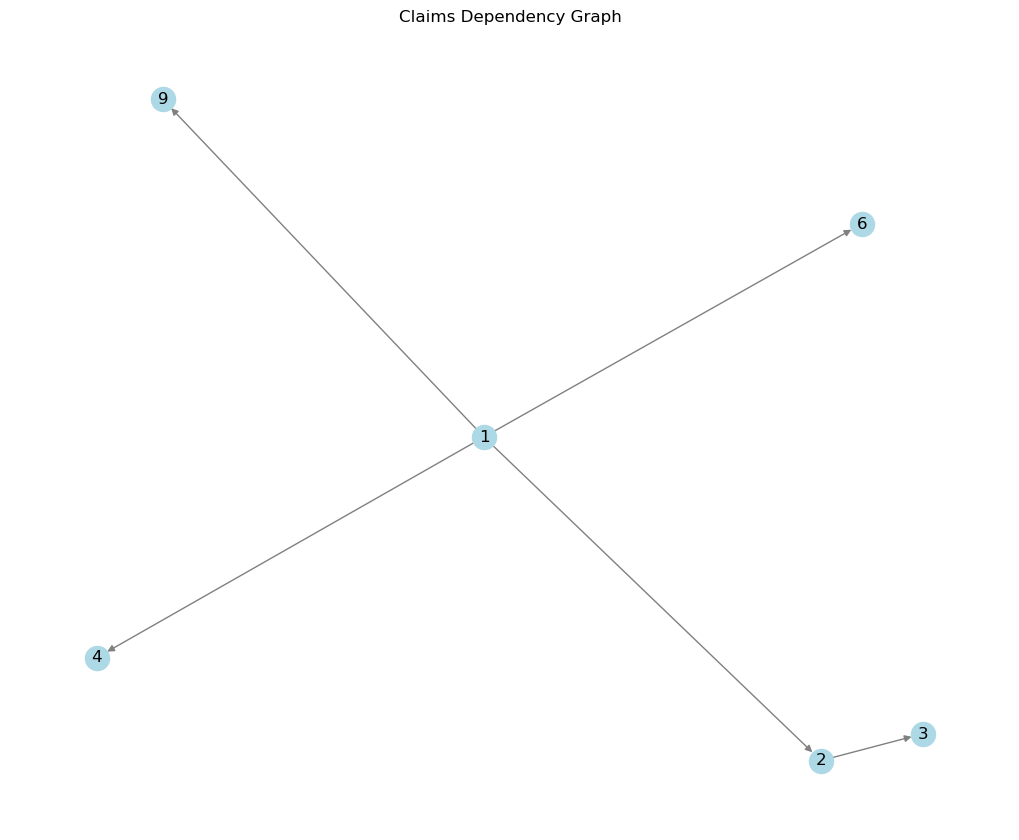

In [65]:
# Plotting the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Claims Dependency Graph')
plt.show()

## different format

In [82]:
import re
from collections import defaultdict

def find_dependencies(tokenized_claims):
    dependencies = defaultdict(list)
    claim_number = None
    accumulated_text = ""

    for item in tokenized_claims:
        if re.match(r"^\d+\.$", item.strip()):
            # If there's a previous claim, process it before moving to the next
            if claim_number is not None and accumulated_text:
                references = re.findall(r"claim (\d+)", accumulated_text)
                for ref in references:
                    dependencies[claim_number].append(int(ref))

            # Reset for the next claim
            claim_number = int(item.strip().replace('.', ''))
            accumulated_text = ""
        elif claim_number is not None:
            accumulated_text += " " + item

    # Process the last claim
    if claim_number is not None and accumulated_text:
        references = re.findall(r"claim (\d+)", accumulated_text)
        for ref in references:
            dependencies[claim_number].append(int(ref))

    return dependencies

In [83]:
dependencies = find_dependencies(tokenized_sentence)

In [84]:
# Creating a graph
G = nx.DiGraph()
for claim, refs in dependencies.items():
    for ref in refs:
        G.add_edge(ref, claim)

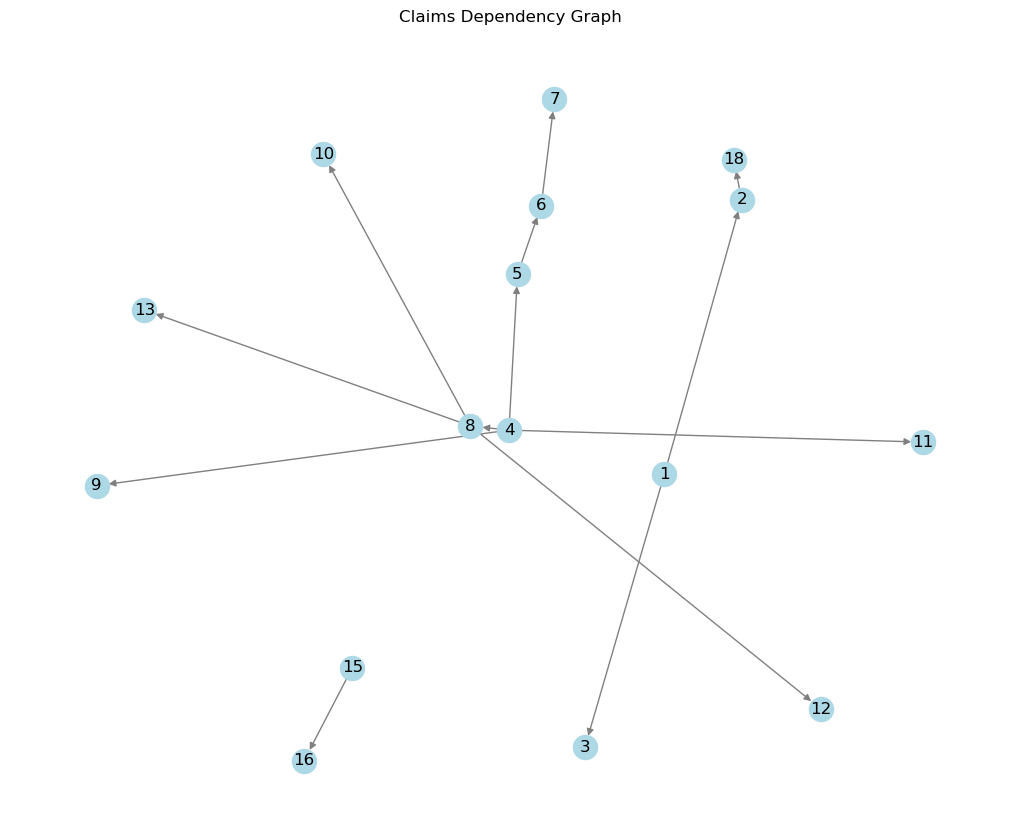

In [85]:
# Plotting the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Claims Dependency Graph')
plt.show()